In [ ]:
!pip install geopandas

In [ ]:
%matplotlib inline

import pandas as pd
import geopandas

1. caricare i quartieri in un geodataframe


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


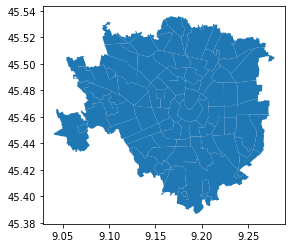

In [ ]:
quartieri = geopandas.read_file("/content/drive/MyDrive/ds964_nil_wm/NIL_WM.dbf")
quartieri.plot()

2. visualizzare l'intestazione


In [ ]:
quartieri.head(1)

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."


3. visualizzare i nomi di tutti i quartieri presenti in ordine alfabetico


In [ ]:
quartieri.sort_values(by=['NIL'],inplace=True)

4. visualizzare tutti i quartieri su una mappa di Milano


In [ ]:
!pip install contextily
import contextily as ctx


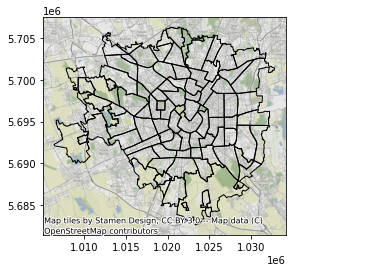

In [ ]:
ax = quartieri.to_crs(epsg=3857).plot(edgecolor='k',facecolor='None')
ctx.add_basemap(ax)

5. cercare il quartiere che contiene il Duomo di Milano


In [ ]:
from shapely.geometry import Point
Duomo_milano = Point(9.191383,45.464211)

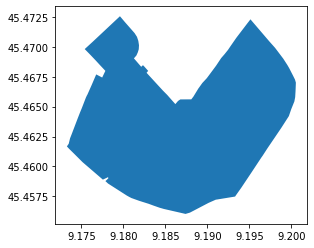

In [ ]:
duomo = quartieri[quartieri.contains(Duomo_milano)]
duomo.plot()

6. visualizzare sulla mappa il Duomo di Milano e il quartiere che lo contiene


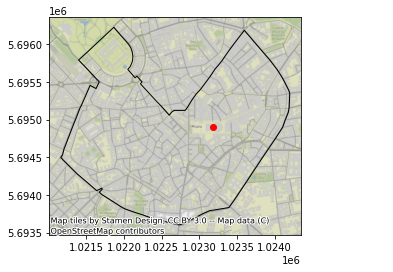

In [ ]:
ax = quartieri[quartieri.contains(Duomo_milano)].to_crs(epsg=3857).plot(facecolor = 'none',edgecolor = 'k')
quartDuomo = geopandas.GeoSeries([Duomo_milano], crs='EPSG:4326').to_crs(epsg=3857).plot(ax=ax, color='red')
ctx.add_basemap(ax)

7. visualizzare i quartieri vicini a quello che contiene il Duomo


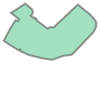

In [ ]:
duo = duomo.geometry.squeeze()
duo

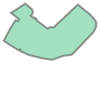

In [ ]:
Duomo_buffer = duo.buffer(0)
Duomo_buffer

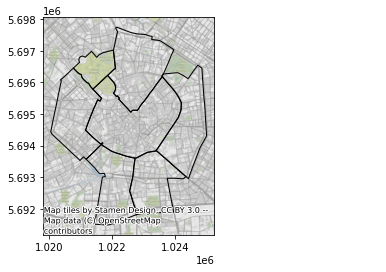

In [ ]:
import contextily as ctx
#epsg=3957  il crs in contextily
ax = quartieri[quartieri.intersects(Duomo_buffer)].to_crs(epsg=3857).plot(edgecolor='k', facecolor='None')
ctx.add_basemap(ax)